In [ ]:
import openmc
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys

CWD = Path.cwd().resolve()
project_root = Path.cwd().parents[2]
sys.path.append(str(project_root))
from parameters.parameters_paths import PATH_TO_CROSS_SECTIONS
openmc.config['cross_sections'] = PATH_TO_CROSS_SECTIONS


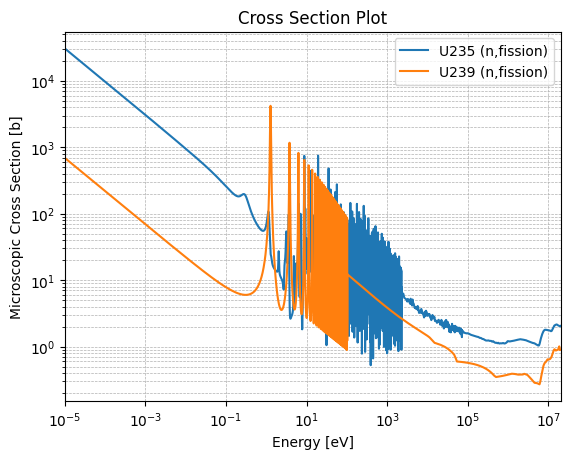

In [22]:
fig, ax = plt.subplots()

fig = openmc.plotter.plot_xs(
    axis=ax,
    reactions = {
        'U235': ['(n,fission)'],
        'U239': ['(n,fission)'],
    }
)

ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(which='both', linestyle='--', linewidth=0.5)
# ax.set_xlim(4e6, 3e7)  
plt.show()

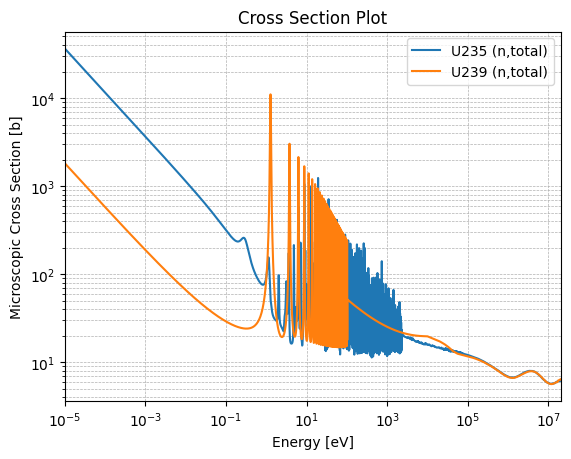

In [35]:
fig, ax = plt.subplots()
fig = openmc.plotter.plot_xs(
    axis=ax,
    reactions = {
        'U235': ['(n,total)'],
        'U239': ['(n,total)'],
    },
    temperature=300.0,  # Kelvin
)

ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(which='both', linestyle='--', linewidth=0.5)
# ax.set_xlim(4e6, 3e7)  
plt.show()

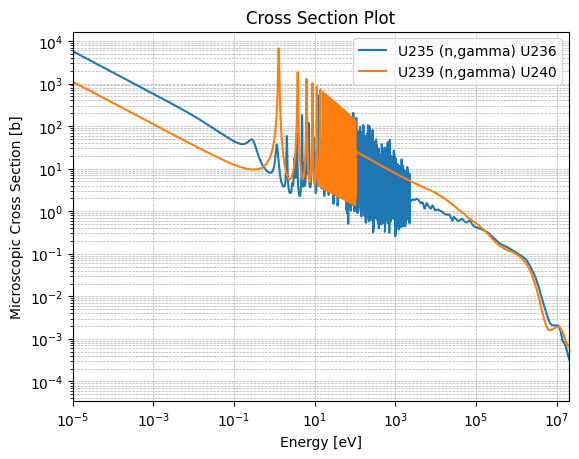

In [27]:
fig, ax = plt.subplots()
fig = openmc.plotter.plot_xs(
    axis=ax,
    reactions = {
        'U235': ['(n,gamma)'],
        'U239': ['(n,gamma)'],
    }
)

ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(which='both', linestyle='--', linewidth=0.5)
# ax.set_xlim(4e6, 3e7)  
plt.show()

In [31]:
energy = np.linspace(1100, 1200, 50000)  # sets the energy range from 1 to 2000eV, this is were a single resonance is

reaction = ["(n,total)"]  # looks up the MT number for the total reaction

h5_file = project_root / "lib" / "cross_sections" / "neutron" / "U235.h5"  # 026056 is Fe56

isotope_multipole = openmc.data.WindowedMultipole.from_hdf5(h5_file)  # loads up the WMP cross section file

fig, ax = plt.subplots()

for temperature in [300, 1000]:   # temperatures in kelvin to plot

    ax.plot(
        energy,
        isotope_multipole(energy, temperature)[reaction],
        label=f"Iron 56 at {temperature} Kelvin"
    )

ax.set_yscale('log')
ax.set_ylabel('Microscopic cross section [barns]')
ax.set_xlabel('Energy [eV]')
ax.legend()
ax.set_title('Total cross section for Fe56 at 300K and 1000K')

DataError: WMP data format uses version 3. 0 whereas your installation of the OpenMC Python API expects version 1.x.

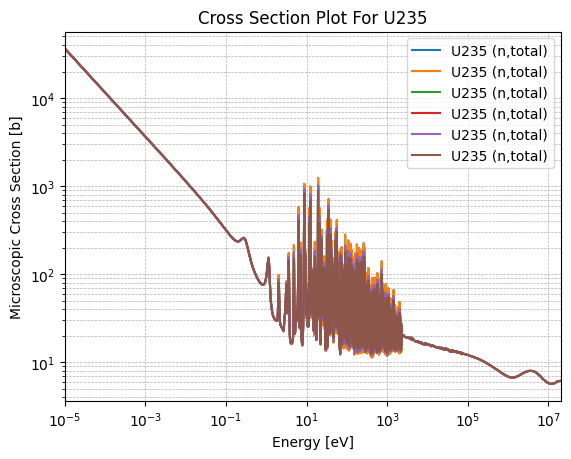

In [39]:
fig, ax = plt.subplots()

for temperature in [300, 400, 500, 600, 700, 1000]:
    fig = openmc.plotter.plot_xs(
        axis=ax,
        reactions={
            'U235': ['(n,total)']
        },
        temperature=temperature,
        label=f'U235 at {temperature}K'
    )

ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(which='both', linestyle='--', linewidth=0.5)
ax.legend()
plt.show()